# Apoplexy Disease Prediction Model




### Introduction

Apoplexy is rupture of an internal organ and the accompanying symptoms. The term formerly referred to what is now called a stroke.

#### Background: 
A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Effective treatments can also help prevent disability from stroke.

#### Objective :
Our objective is to understand what are the reasons that cause Apoplexy to people and to Determine whether a person has Apoplexy based on the dataset using ML techniques.

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score,classification_report,roc_auc_score,confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

## 2. Importing the dataset 

In [2]:
dataset=pd.read_csv('DiseasePrediction.csv')
#Displaying top 5 rows of dataset
dataset.head(5)
#dataset.columns

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3. Data cleaning or Exploratory Data Analysis(EDA) 📊
Checking for quality of the dataset, missing values and removing the unwanted columns which are not required for training.

In [3]:
no_of_rows,no_of_columns = dataset.shape
print('Total Rows:',no_of_rows,'\nTotal Columns:',no_of_columns,'\n')

#Showing information about dataset
dataset.info()

#Checking for missing data
dataset.isna().sum()

Total Rows: 5110 
Total Columns: 12 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  apoplexy           5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
apoplexy               0
dtype: int64

### Countplot 
Countplot for checking how each column effecting the chance of getting Apoplexy.

In [4]:
#Plottting parameters and apoplexy with percentage.
def Count_plot(column):
    plt.figure(figsize=(6,4))
    total = float(len(dataset))
    ax = sns.countplot(x=column, hue="apoplexy", data=dataset)
    plt.title(f'Effect of {column} on Apoplexy', fontsize=14)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

#### Apoplexy

Apoplexy
 0    4861
1     249
Name: apoplexy, dtype: int64


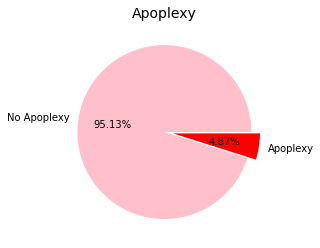

In [5]:
print('Apoplexy\n',dataset['apoplexy'].value_counts())

label = ["No Apoplexy","Apoplexy"]
values = dataset['apoplexy'].value_counts().tolist()
plt.pie(x=values, labels=label, autopct="%1.2f%%",colors=['pink','red'], explode=[0, 0.1])
plt.title("Apoplexy", fontdict={'fontsize': 14})
plt.show()

#The ratio for Apoplexy and No Apoplexy is approximately 1:19 i.e 1 in 19 people are affected by Apoplexy in the dataset.
#So, dataset is highly imbalanced.

#### Id column 🆔

In [6]:
#Checking for uniques values in Id column
print('Unique columns in ID:',dataset.id.nunique())

#Since all values are unique and Id column is just only for identification. So, we are dropping the column.
dataset=dataset.drop(columns='id')
dataset.head(10)

Unique columns in ID: 5110


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


#### Age 👴

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


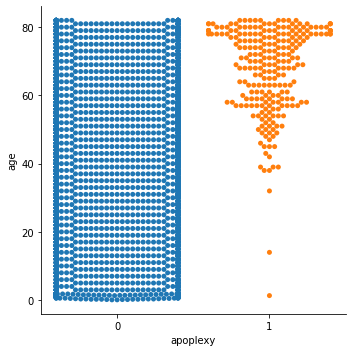

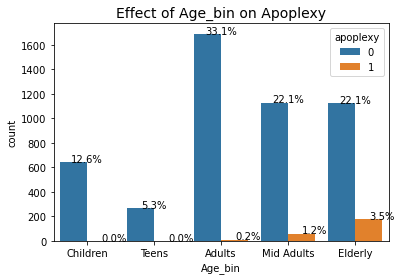

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy,Age_bin
0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Elderly
2,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly
3,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Mid Adults
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly
5,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Elderly
6,Male,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Elderly
7,Female,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Elderly
8,Female,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,Mid Adults
9,Female,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Elderly


In [7]:
print(dataset['age'].describe())

#Checking whether Age effects apoplexy
sns.catplot(data=dataset, kind = "swarm", x="apoplexy", y="age")

#Apoplexy chances increases with age, starting from age 35.
#Also, for persons with age above 50 have high chance of getting apoplexy.

#Since we have high difference between min and max age, using Binning to divide age into Categories..
dataset['Age_bin'] = pd.cut(dataset['age'], bins = [0,13,18,45,60,100], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

Count_plot('Age_bin')
#From plot we can say- Elderly people have high chance of getting Apoplexy.

#Dropping the Age column
dataset=dataset.drop(columns='age')
dataset.head(10)

#### Gender ♀♂

No of persons per each Gender
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


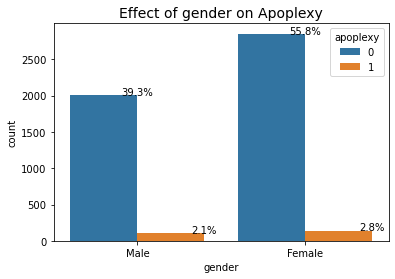

In [8]:
# Count of values
print('No of persons per each Gender\n',dataset['gender'].value_counts())

#Deleting the single data of gender 'Other'.
dataset.drop(dataset[dataset.gender == 'Other'].index, inplace = True)
#Checking whether Gender effecting the chance of getting apoplexy using Countplot
Count_plot('gender')

#from below plot we could say gender is not affecting apoplexy much..

#### Hypertension ﮩ٨ـﮩـ♡ﮩ٨ـ     

Hypertension
 0    4611
1     498
Name: hypertension, dtype: int64


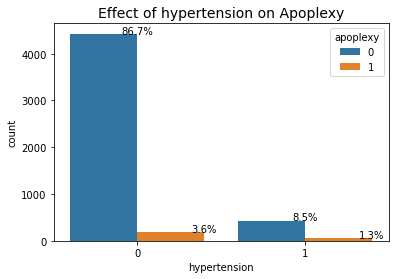

In [9]:
#Checking whether Hypertension effects apoplexy
print('Hypertension\n',dataset['hypertension'].value_counts())

Count_plot('hypertension')
#From plot we can say hypertension has effectiveness to Apoplexy. 
#Also Hypertension is one of the essential paremeter for getting apoplexy(medical perspection)

#### Heart disease  ❤

Heart disease
 0    4833
1     276
Name: heart_disease, dtype: int64


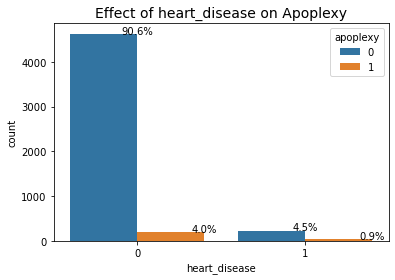

In [10]:
#Checking whether Heart disease effects apoplexy
print('Heart disease\n',dataset['heart_disease'].value_counts())

Count_plot('heart_disease')
#From Plot we can say persons with heart_disease has high chance for getting Apoplexy.

#### Ever_Marrried  💍

Marriage status
 Yes    3353
No     1756
Name: ever_married, dtype: int64


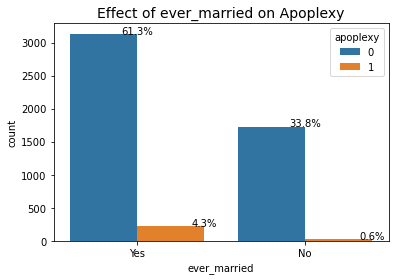

In [11]:
#Checking whether Ever_married effects apoplexy
print('Marriage status\n',dataset['ever_married'].value_counts())

Count_plot('ever_married')
#From plot we can say married persons may have chance of getting apoplexy.

#### Work_type 👨‍🏭

Work_types
 Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


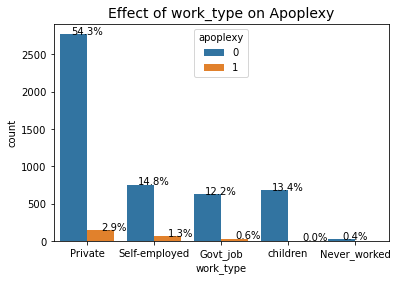

In [12]:
#Checking whether Work_type effects apoplexy
print('Work_types\n',dataset['work_type'].value_counts())

Count_plot('work_type')
#From plot we can say people who working as self-employed,private most likely to get apoplexy than never worked.

#### Residence_type  🏡

Residence_types
 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


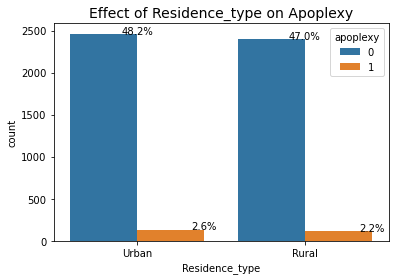

In [13]:
#Checking whether Residence_type effects apoplexy
print('Residence_types\n',dataset['Residence_type'].value_counts())

Count_plot('Residence_type')
#from plot we can say residence type have no effect on the risk of Apoplexy.

#### Avg_glucose_level  💉

<AxesSubplot:xlabel='apoplexy', ylabel='avg_glucose_level'>

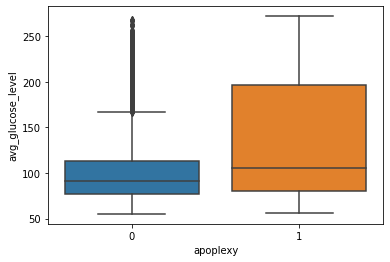

In [14]:
#Checking whether avg_glucose_level effects apoplexy
sns.boxplot(data=dataset, x='apoplexy', y='avg_glucose_level')

#From plot we can say persons having avg_glucose_level greater then 100 has higher chance of getting apoplexy.
#But with higher glucose levels morethan 170 persons have no apoplexy.

#### BMI 🦴

No of missing values(BMI): 201


Text(0.5, 0, 'Level of the BMI')

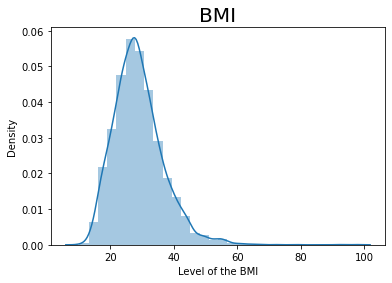

In [15]:
#For BMI we have some missing values.
print('No of missing values(BMI):',dataset['bmi'].isna().sum())

#Around 201 rows are missing for BMI.
#Deletion of rows may effects the prediction. We will replace them with mean.

sns.distplot(dataset.bmi,bins=30)
plt.title(f'BMI',fontsize=20)
plt.xlabel("Level of the BMI")


<AxesSubplot:xlabel='apoplexy', ylabel='bmi'>

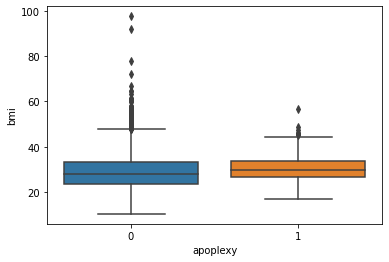

In [16]:
#Checking whether BMI effects apoplexy
sns.boxplot(data=dataset,x='apoplexy',y='bmi')

#from plot we can't predict how BMI has impact on apoplexy(more outliers..)

#### Smoking_status 🚬

Smoking status
 never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


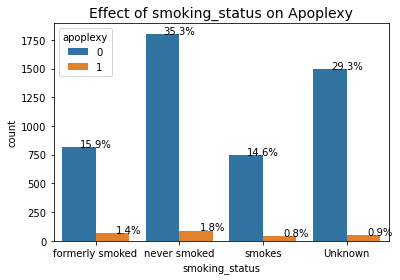

In [17]:
# Checking whether smoking_status effects apoplexy
print('Smoking status\n',dataset['smoking_status'].value_counts())

Count_plot('smoking_status')

#Since we have imbalanced data. From plot, we can't predict whether smoking is the factor for apoplexy. 
#But as per our basic knowledge smoking may have some effect on apoplexy(medical perspective)

## 4. Splitting of dataset into Train set and Test set

In [18]:
dataset['apoplexy']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: apoplexy, Length: 5109, dtype: int64

In [19]:
#dataset['apoplexy'] = dataset['apoplexy'].map({'Yes':1, 'No':0})
X=dataset.drop('apoplexy',axis=1)
y=dataset['apoplexy']

In [20]:
dataset['apoplexy']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: apoplexy, Length: 5109, dtype: int64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=500)

In [22]:
X_Train,y_Train = X_train,y_train  #for hyperparameter tuning
X_Test,y_Test = X_test,y_test
X_train,y_train,X_Train

(      gender  hypertension  heart_disease ever_married      work_type  \
 1193  Female             0              1           No        Private   
 4971  Female             0              0          Yes        Private   
 2764  Female             0              0          Yes        Private   
 1759  Female             0              0          Yes        Private   
 1017    Male             0              0          Yes  Self-employed   
 ...      ...           ...            ...          ...            ...   
 3005    Male             0              0          Yes       Govt_job   
 3791  Female             0              0          Yes       Govt_job   
 273   Female             0              0          Yes        Private   
 3906    Male             0              0          Yes       Govt_job   
 951     Male             0              0           No       children   
 
      Residence_type  avg_glucose_level   bmi   smoking_status     Age_bin  
 1193          Rural             

## 5. Data Preprocessing

There are 12 features(11 + target) in total. We have removed 'Age' column from the dataset.
We remain with 10 features.

1. Numerical features ('avg_glucose_level', 'bmi') 

2. Categorical features ('gender', 'Age_bin', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'). 

The preprocessing for numerical and categorical features is different. So, building pipelines for numerical and categorical features separately.

### 1. Preprocessing Numerical features

#### Creating Numerical Pipeline

    1. Impute null values with mean

    2. Feature Scaling

In [23]:
numerical_columns=X_train.select_dtypes(include=['int64','float64']).columns

In [24]:
numerical_columns

Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

### Creating Numerical Pipeline

In [25]:
#numerical pipeline

numerical_pipeline=Pipeline([
    ('numerical_imputer',SimpleImputer(missing_values=np.nan, strategy='mean')), # replacing missing values in bmi with mean
    ('feature_scaling',StandardScaler())
])

In [26]:
numerical_pipeline

Pipeline(steps=[('numerical_imputer', SimpleImputer()),
                ('feature_scaling', StandardScaler())])

### 2. Preprocessing Categorical features

#### Creating Categorical Pipeline

    1. Encooding Categorical variables using OrdinalEncoder

In [27]:
categorical_columns=X_train.select_dtypes(include=['object','category']).columns

In [28]:
categorical_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'Age_bin'],
      dtype='object')

### Creating Categorical Pipeline

In [29]:
#Categorical pipeline
categorical_pipeline=Pipeline([
    ('categorical_encoder', OrdinalEncoder())
])

In [30]:
categorical_pipeline

Pipeline(steps=[('categorical_encoder', OrdinalEncoder())])

### 3. Column Transformer

We have applied transformations separately for numerical and categorical features. Using ColumnTransformer through which we can apply different transformations on different columns at the same time. 

In [63]:
column_pipeline=ColumnTransformer([
    ("numerical_pipeline",numerical_pipeline,numerical_columns),
    ("categorical_pipeline",categorical_pipeline,categorical_columns)
])
print(column_pipeline)

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('numerical_imputer',
                                                  SimpleImputer()),
                                                 ('feature_scaling',
                                                  StandardScaler())]),
                                 Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('categorical_encoder',
                                                  OrdinalEncoder())]),
                                 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'Age_bin'],
      dtype='object'))])


In [32]:
# Preprocessing the X_train set through pipeline

X_train_processed=column_pipeline.fit_transform(X_train)
X_train.shape,X_train_processed.shape,y_train.shape

((4087, 10), (4087, 10), (4087,))

In [65]:
X_train[0]

array([-0.32063415,  4.13328813,  0.07102575, -0.8656184 ,  0.        ,
        0.        ,  2.        ,  0.        ,  3.        ,  3.        ])

### Smote Method
Since dataset is imbalanced we are using SMOTE method to oversample and balance the dataset.

In [34]:
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train_processed,y_train)  

## 6.Training the model using XGBClassifier

In [35]:
model = XGBClassifier(max_depth= 5,eval_metric='logloss',random_state=0)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Re-using same pipeline to Test set and Predicting the results

In [36]:
X_test=column_pipeline.transform(X_test)
print(X_test.shape)

X_test,y_test = smote.fit_resample(X_test,y_test)
y_pred=model.predict(X_test)

prob_x=model.predict_proba(X_test)
accuracy_score(y_test,y_pred)

(1022, 10)


0.9292355371900827

## 7.Performance Evaluation

#### Accuracy, F1 Score, Classification Report, ROC-AUC Score

Accuracy -->  0.9292355371900827
F1 Score -->  0.9254218835057159
precision -->  0.9781357882623706
Recall -->  0.878099173553719
ROC-AUC Score: 0.9292355371900827
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       968
           1       0.98      0.88      0.93       968

    accuracy                           0.93      1936
   macro avg       0.93      0.93      0.93      1936
weighted avg       0.93      0.93      0.93      1936



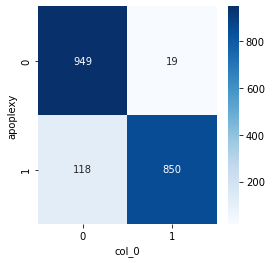

In [37]:
print('Accuracy --> ',accuracy_score(y_test,y_pred))
print('F1 Score --> ',f1_score(y_test,y_pred))
print('precision --> ',precision_score(y_test,y_pred))
print('Recall --> ',recall_score(y_test,y_pred))
#ROC-AUC score
auc_score = roc_auc_score(y_test,y_pred)
print('ROC-AUC Score:',auc_score)

print('Classification Report  --> \n',classification_report(y_test,y_pred))
plt.subplots(figsize=(4,4))
sns.heatmap(pd.crosstab(y_test,y_pred),annot=True,cmap="Blues", fmt='.0f');

### Hyperparameter Tuning with Pipelines(Grid SearchCV)

In [38]:
pipeline_modeling=Pipeline([
    ('preprocessing',column_pipeline),
    ('model',XGBClassifier())
])

In [39]:
parameter_grid = [
    {
        "preprocessing__numerical_pipeline__numerical_imputer__strategy": ['median', 'mean'],
        "preprocessing__numerical_pipeline__feature_scaling": [StandardScaler(), RobustScaler()],
        "model": [DecisionTreeClassifier()],
        "model__criterion": ["gini", "entropy"],
        "model__max_depth": [10, 20]
    },
    {
        "preprocessing__categorical_pipeline__categorical_encoder": [OneHotEncoder(), OrdinalEncoder()],
        "model": [XGBClassifier(eval_metric='logloss')],
        "model__n_estimators": [10, 100, 500],
        "model__learning_rate": [0.1, 0.3, 1],
        "model__max_depth": [5, 6, 10],
    },
    {
        "model": [RandomForestClassifier()],
        "model__max_depth": [10, 15,20],
        "model__n_estimators": [50, 100],
        "model__criterion":['gini', 'entropy'],
    },
    {
        "model": [SVC()],
        "model__C": [0.25, 0.5, 1],
        "model__kernel": ['linear','rbf'],
        "model__gamma": [0.1, 0.5, 0.9]
    }
]

In [40]:
# Initialize grid search
grid_search = GridSearchCV(pipeline_modeling, parameter_grid, cv=5, verbose=0)
# Fit data
grid_search.fit(X_Train, y_Train)

# Getting best estimator
print(grid_search.best_estimator_)
print('\n----------')
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

grid_search.score(X_Test, y_Test)

KeyboardInterrupt: 

### Training other Classification models for performance evaluation

In [ ]:
#Logistic Regression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
predict1 = classifier.predict_proba(X_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)
predict2=knn.predict_proba(X_test)

#SVM
svm=SVC(kernel='rbf',random_state=0,probability=True)
svm.fit(X_train,y_train)
predict3=svm.predict_proba(X_test)

#Naive bayes
naiveb=GaussianNB()
naiveb.fit(X_train,y_train)
predict4=naiveb.predict_proba(X_test)

#Decision tree classifier
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree.fit(X_train,y_train)
predict5=dtree.predict_proba(X_test)

#Random forest
rforest=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
#random_state parameter be provided to control the random number generator used. 
rforest.fit(X_train,y_train)
predict6=rforest.predict_proba(X_test)

#XGBClassifier
prob_x=model.predict_proba(X_test)

In [ ]:
#Loading parameters for building ROC curve
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, predict1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, prob_x[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predict2[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predict3[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, predict4[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, predict5[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, predict6[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

### ROC Curve

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGB Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='K-Nearest Neighbors')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Naive Bayes')
plt.plot(fpr6, tpr6, linestyle='--',color='black', label='Decision Tree classifier')
plt.plot(fpr7, tpr7, linestyle='--',color='brown', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc=4)
#plt.savefig('ROC',dpi=10)
plt.show();

In [ ]:
-------

### Conclusion
From the above AUC_ROC curve we can say that XGBClassifier was effective method for predicting the chance of getting Apoplexy.

### Pickling the model

In [49]:

import pickle
#with open("model.pkl",'wb') as file_obj:
#    dill.dump(model, file_obj)
model=pickle.dump(model,open('model1.pkl','wb'))

In [50]:
pickled_model = pickle.load(open('model1.pkl', 'rb'))

In [46]:
with open("model.pkl",'rb') as file:
    output=pickle.load(file)

ModuleNotFoundError: No module named 'dill'

In [54]:
X_train_processed[0]

array([-0.32063415,  4.13328813,  0.07102575, -0.8656184 ,  0.        ,
        0.        ,  2.        ,  0.        ,  3.        ,  3.        ])

In [61]:
#output.predict([Female,82,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked])
t={"gender":['Female'],"Age_bin":["Adults"],"hypertension":[1],"heart_disease":[0],"ever_married":['Yes'],"work_type":["Self-employed"],"Residence_type":["Urban"],"avg_glucose_level":[196.92],"bmi":[22.2],"smoking_status":["never smoked"]}
l=pd.DataFrame(t)

In [62]:
print(pickled_model.predict(column_pipeline.transform(l)))

[0]


In [67]:
x=pd.DataFrame(X_Train)
x

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_bin
1193,Female,0,1,No,Private,Rural,109.69,22.2,smokes,Mid Adults
4971,Female,0,0,Yes,Private,Urban,57.06,37.9,never smoked,Elderly
2764,Female,0,0,Yes,Private,Urban,85.55,63.3,never smoked,Adults
1759,Female,0,0,Yes,Private,Rural,176.48,24.0,formerly smoked,Adults
1017,Male,0,0,Yes,Self-employed,Rural,116.67,33.5,never smoked,Elderly
...,...,...,...,...,...,...,...,...,...,...
3005,Male,0,0,Yes,Govt_job,Urban,227.89,38.8,formerly smoked,Mid Adults
3791,Female,0,0,Yes,Govt_job,Urban,102.84,22.4,never smoked,Adults
273,Female,0,0,Yes,Private,Urban,109.82,23.7,never smoked,Mid Adults
3906,Male,0,0,Yes,Govt_job,Urban,122.39,30.3,Unknown,Mid Adults


In [70]:
X_Train.to_csv ("Train.csv", index = False)